In [33]:
%cd '/content/drive/MyDrive/Data/2. Linear Regression'
!ls

/content/drive/.shortcut-targets-by-id/1HIgy7_aoSlAA67JTIc__jUFdvLjQFldJ/Data/2. Linear Regression
 data_linear.csv   LinearRegression.ipynb
 data_square.csv  'Linear regression.pdf'


### Import thư viện

In [34]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import math

# Bài 1

Implement thuật toán gradient descent tìm giá trị nhỏ nhất hàm f(x)=x^2, thử các giá trị learning_rate khác nhau (nhỏ, vừa, lớn, rất lớn), vẽ đồ thị loss function theo epoch tương ứng.

In [35]:
# Đạo hàm của hàm y = x^2
def grad(x):
  return 2 * x

# Giá trị của hàm y = x^2
def cost(x):
  return x * x

# Triển khai gradient descent
def gradient_decent(x0, lr = 0.1, nepoches = 1000, eps = 0.001, isBreak = True):
  x = [x0]
  cost_his = [cost(x0)]
  for it in range(nepoches):
    x_old = x[-1]
    x_new = x_old - lr * grad(x_old)
    if isBreak and abs(x_new - x_old) < eps:
      break
    x.append(x_new)
    cost_his.append(cost(x_new))
    
  return it, x, cost_his

In [36]:
np.random.seed(2)
x_init = np.random.rand() * 10
print("X init = ", x_init)

it, x, cost_hist = gradient_decent(x_init, 0.1, 100)

print("Giá trị nhỏ nhất của hàm số y = x^2 là %.6f sau %d lần lặp"  %(cost_hist[-1], it + 1))

X init =  4.359949021420038
Giá trị nhỏ nhất của hàm số y = x^2 là 0.000019 sau 32 lần lặp


Thử các learning rate khác nhau 0.01, 0.1, 0.4, 1.5. Vẽ đồ thị loss.

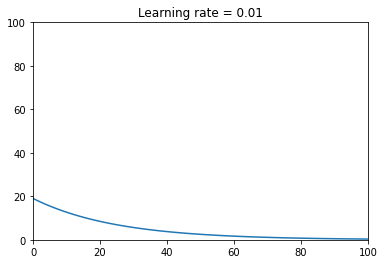

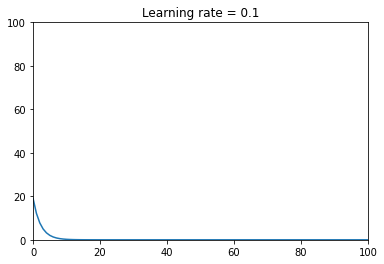

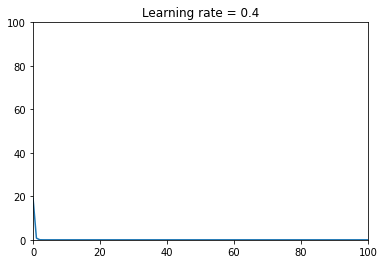

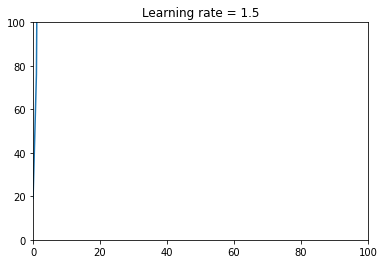

In [37]:
learning_rate = [0.01, 0.1, 0.4, 1.5]
epoches = 100
for lr in learning_rate:
  it, x, cost_hist = gradient_decent(x_init, lr, epoches, isBreak = False)
  plt.plot(np.arange(len(cost_hist)), cost_hist, '-')
  plt.axis([0, epoches, 0, 100])
  plt.title(f"Learning rate = {lr}")
  plt.show()


# Bài 3

Hiểu code phần thực hành cho linear regression. Vẽ thêm biểu đồ cho loss function theo epoch. Thay đổi các giá trị learning_rate khác nhau xem đồ thị loss trông thế nào.

In [38]:
# X có shape là (N, d+1)
# W có shape là (d+1, 1)
# Y có shape là (N, 1)

# Đạo hàm của hàm loss theo vector W, trả về shape (d+1, 1)
def grad(X, Y, W):
  return X.T @ (X @ W - Y)

# Giá trị hàm loss, trả về 1 giá trị (lấy log để tránh tràn số)
def cost(X, Y, W):
  loss = X @ W - Y
  N = X.shape[0]
  return 0.5 / N * (loss.T @ loss)[0]
  
# Triển khai thuật toán Linear Regression
def LinearRegression(X, Y, w_init, lr = 0.01, nepoches = 1000, eps = 0.001):
  d = w_init.shape[0]

  # Lưu lịch sử w
  w = [w_init]  

  # Lưu lịch sử cost
  cost_hist = [cost(X, Y, w_init)]

  for it in range(nepoches):
    w_old = w[-1]
    w_new = w_old - lr * grad(X, Y, w_old)
    if np.linalg.norm(w_new - w_old) / d < eps:
      break
    w.append(w_new)
    cost_hist.append(cost(X, Y, w_new))
  
  return it, w, cost_hist

Chuẩn bị dữ liệu

In [39]:
data_frame = pd.read_csv('data_linear.csv')
data = np.array(data_frame)

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
N = data.shape[0]
d = x.shape[1]

w_init = np.array([0., 1.]).reshape(-1, 1)

Xbar = np.concatenate((np.ones((N, 1)), x), axis = 1)
Xbar

array([[  1.    ,  30.    ],
       [  1.    ,  32.4138],
       [  1.    ,  34.8276],
       [  1.    ,  37.2414],
       [  1.    ,  39.6552],
       [  1.    ,  42.069 ],
       [  1.    ,  44.4828],
       [  1.    ,  46.8966],
       [  1.    ,  49.3103],
       [  1.    ,  51.7241],
       [  1.    ,  54.1379],
       [  1.    ,  56.5517],
       [  1.    ,  58.9655],
       [  1.    ,  61.3793],
       [  1.    ,  63.7931],
       [  1.    ,  66.2069],
       [  1.    ,  68.6207],
       [  1.    ,  71.0345],
       [  1.    ,  73.4483],
       [  1.    ,  75.8621],
       [  1.    ,  78.2759],
       [  1.    ,  80.6897],
       [  1.    ,  83.1034],
       [  1.    ,  85.5172],
       [  1.    ,  87.931 ],
       [  1.    ,  90.3448],
       [  1.    ,  92.7586],
       [  1.    ,  95.1724],
       [  1.    ,  97.5862],
       [  1.    , 100.    ]])

Bộ tham số (w0, w1) cần tìm là (0.1957, 15.1098) sau 11 lần lặp.


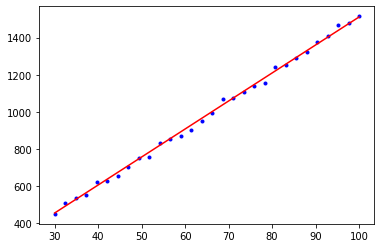

In [40]:
# Với learning_rate = 5e-6
it, w, cost_hist = LinearRegression(Xbar, y, w_init, lr=5e-6, nepoches=100, eps = 0.0001)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
print('Bộ tham số (w0, w1) cần tìm là (%.4f, %.4f) sau %d lần lặp.' %(w0, w1, it+1))

# Dự đoán giá cho nhà 50m2
y_pred = Xbar @ w[-1]
plt.plot(x, y, 'b.')
plt.plot(x, y_pred, 'r')
plt.show()

Thử với các learning rate khác nhau như 1e-7, 5e-7, 1e-6, 5e-6, 1e-5

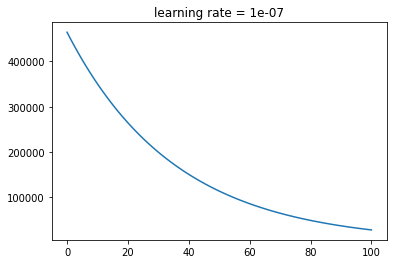

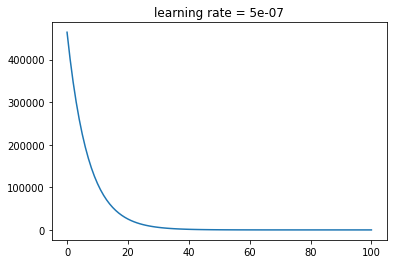

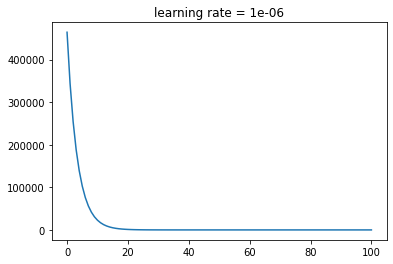

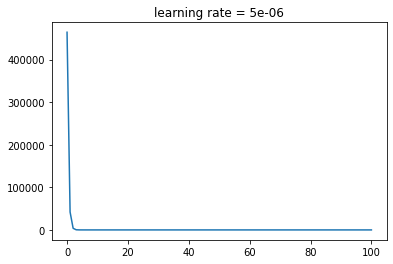

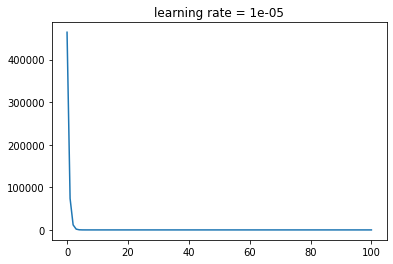

In [41]:
learning_rate = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5]
epoch = 100
for lr in learning_rate:
  it, w, cost_hist = LinearRegression(Xbar, y, w_init, lr, epoch, eps = 0) # Đặt eps = 0 để hàm lặp hết 100 lần
  plt.plot(np.arange(len(cost_hist)), cost_hist)
  plt.title(f"learning rate = {lr}")
  plt.show()


# Bài 4

Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky).

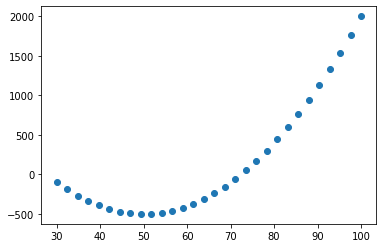

In [42]:
data_square = pd.read_csv('data_square.csv').values

x = data_square[:, 0].reshape(-1, 1)
y = data_square[:, 1].reshape(-1, 1)
N = x.shape[0]
plt.scatter(x, y)
plt.show()

Dữ liệu input

In [43]:
x2 = x * x
Xbar = np.concatenate((np.ones((N, 1)), x, x2), axis = 1)
Xbar

array([[1.00000000e+00, 3.00000000e+01, 9.00000000e+02],
       [1.00000000e+00, 3.24138000e+01, 1.05065443e+03],
       [1.00000000e+00, 3.48276000e+01, 1.21296172e+03],
       [1.00000000e+00, 3.72414000e+01, 1.38692187e+03],
       [1.00000000e+00, 3.96552000e+01, 1.57253489e+03],
       [1.00000000e+00, 4.20690000e+01, 1.76980076e+03],
       [1.00000000e+00, 4.44828000e+01, 1.97871950e+03],
       [1.00000000e+00, 4.68966000e+01, 2.19929109e+03],
       [1.00000000e+00, 4.93103000e+01, 2.43150569e+03],
       [1.00000000e+00, 5.17241000e+01, 2.67538252e+03],
       [1.00000000e+00, 5.41379000e+01, 2.93091222e+03],
       [1.00000000e+00, 5.65517000e+01, 3.19809477e+03],
       [1.00000000e+00, 5.89655000e+01, 3.47693019e+03],
       [1.00000000e+00, 6.13793000e+01, 3.76741847e+03],
       [1.00000000e+00, 6.37931000e+01, 4.06955961e+03],
       [1.00000000e+00, 6.62069000e+01, 4.38335361e+03],
       [1.00000000e+00, 6.86207000e+01, 4.70880047e+03],
       [1.00000000e+00, 7.10345

Giá trị khởi tạo của w

In [44]:
d = Xbar.shape[1] # số cột của X
np.random.seed(3)
w_init = np.random.randn(d, 1)
w_init

array([[1.78862847],
       [0.43650985],
       [0.09649747]])

Khai báo các hàm sẽ sử dụng

In [47]:
# Dùng lại hàm LinearRegression của bài tập trên

# X có shape là (N, d+1)
# W có shape là (d+1, 1)
# Y có shape là (N, 1)

# Đạo hàm của hàm loss theo vector W, trả về shape (d+1, 1)
def grad(X, Y, W):
  return X.T @ (X @ W - Y)

# Giá trị hàm loss, trả về 1 giá trị
def cost(X, Y, W):
  loss = X @ W - Y
  N = X.shape[0]
  return 0.5 / N * (loss.T @ loss)[0]

# Triển khai thuật toán Linear Regression
def LinearRegression(X, Y, w_init, lr = 0.01, nepoches = 1000, eps = 0.001):
  d = w_init.shape[0]

  # Lưu lịch sử w
  w = [w_init]  

  # Lưu lịch sử cost
  cost_hist = [cost(X, Y, w_init)]

  for it in range(nepoches):
    w_old = w[-1]
    w_new = w_old - lr * grad(X, Y, w_old)
    if np.linalg.norm(w_new - w_old) / d < eps:
      break
    w.append(w_new)
    cost_new = cost(X, Y, w_new)
    cost_hist.append(cost_new)
  
  return it, w, cost_hist

# Hàm chuẩn hóa đầu vào
def Normalize(X):
  x1 = np.copy(X)
  s = np.std(x1, axis = 0, dtype = np.float64)
  mu = np.mean(x1, axis = 0)
  x1 = (x1-mu)/s
  return x1, mu, s

In [48]:
# Chuẩn hóa đầu vào
t = np.copy(Xbar)
t[0, 0] = 100
Xbar_normalized, mu_x, s_x = Normalize(t)
Xbar_normalized[:, 0] = 1
Xbar_normalized

array([[ 1.        , -1.67524738, -1.37088657],
       [ 1.        , -1.55971275, -1.31598016],
       [ 1.        , -1.44417812, -1.25682683],
       [ 1.        , -1.32864348, -1.19342658],
       [ 1.        , -1.21310885, -1.12577942],
       [ 1.        , -1.09757422, -1.05388534],
       [ 1.        , -0.98203959, -0.97774435],
       [ 1.        , -0.86650496, -0.89735644],
       [ 1.        , -0.75097511, -0.8127252 ],
       [ 1.        , -0.63544048, -0.72384364],
       [ 1.        , -0.51990584, -0.63071515],
       [ 1.        , -0.40437121, -0.53333975],
       [ 1.        , -0.28883658, -0.43171743],
       [ 1.        , -0.17330195, -0.3258482 ],
       [ 1.        , -0.05776732, -0.21573205],
       [ 1.        ,  0.05776732, -0.10136898],
       [ 1.        ,  0.17330195,  0.017241  ],
       [ 1.        ,  0.28883658,  0.1400979 ],
       [ 1.        ,  0.40437121,  0.26720172],
       [ 1.        ,  0.51990584,  0.39855245],
       [ 1.        ,  0.63544048,  0.534

In [57]:
it, w, cost_hist = LinearRegression(Xbar_normalized, y, w_init, lr=1e-2, nepoches = 10_000, eps = 1e-12)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]

print("Hội tụ sau %d lần lặp." %(it+1))

y_pred = Xbar_normalized @ w[-1]
print(y_pred)

Hội tụ sau 9483 lần lặp.
[[ -99.99908082]
 [-190.7248871 ]
 [-269.79780933]
 [-337.21784751]
 [-392.98500165]
 [-437.09927175]
 [-469.56065781]
 [-490.36915981]
 [-499.52463985]
 [-497.02785653]
 [-482.87818916]
 [-457.07563775]
 [-419.6202023 ]
 [-370.5118828 ]
 [-309.75067926]
 [-237.33659168]
 [-153.26962004]
 [ -57.54976437]
 [  49.82297535]
 [ 168.84859911]
 [ 299.52710692]
 [ 441.85849878]
 [ 595.83615397]
 [ 761.47283116]
 [ 938.76239238]
 [1127.70483765]
 [1328.30016697]
 [1540.54838033]
 [1764.44947773]
 [2000.00345918]]


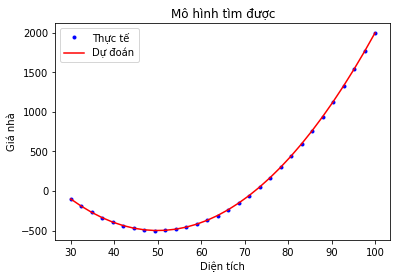

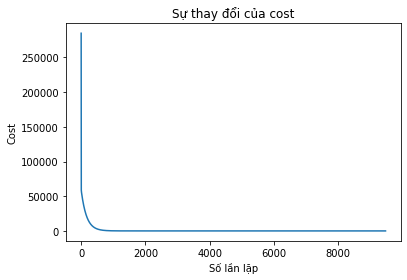

In [61]:
plt.plot(Xbar[:, 1], y, 'b.')
plt.plot(Xbar[:, 1], y_pred, 'r-')
plt.title('Mô hình tìm được')
plt.xlabel('Diện tích')
plt.ylabel('Giá nhà')
plt.legend(['Thực tế', 'Dự đoán'])
plt.show()

plt.plot(cost_hist)
plt.title('Sự thay đổi của cost')
plt.xlabel('Số lần lặp')
plt.ylabel('Cost')
plt.show()